## Brief and libraries

Просмотр фильмов в оригинале это популярный способ прокачать языковые навыки. Важно выбрать фильм, который подходит студенту по уровню сложности языка, чтобы было понятно 50-70% диалогов. 

Необходимо разработать ML решение автоматического определения уровня сложности языка в фильмах на английской языке. 

In [1]:
import numpy as np 
import pandas as pd 
import datetime
import sklearn
from pathlib import Path
import glob
import pysrt
import os
from difflib import get_close_matches
from sklearn.utils import resample

import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import requests
from bs4 import BeautifulSoup

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, classification_report 

from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')


import urllib.request
from zipfile import ZipFile
from io import BytesIO
from pathlib import Path        


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\90sds\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\90sds\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\90sds\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\90sds\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# url = 'https://https://disk.yandex.ru/d/rQHuC6p6Ztf9Uw/English_scores.zip'  # Replace with your URL

# response = requests.get(url)
# zip_content = BytesIO(response.content)

# with zipfile.ZipFile(zip_content, 'r') as zip_file:
#     dff = []  # Initialize the list

#     # Iterate over the files in the zip
#     for file_name in zip_file.namelist():
#         if file_name.endswith('.srt'):
#             with zip_file.open(file_name) as file:
#                 subs = pysrt.from_string(file.read().decode('latin-1'))
#                 text = " ".join([sub.text for sub in subs])
#                 dff.append(text)

# # Create the dataframe
# dfff = pd.DataFrame(df_1, columns=['text'])
# dfff['type'] = 'A2'

# # Print the dataframe
# print(dfff)

## Text consolidation to a dataframe

Файлы с субтитрами фильмов находятся в разных папках, их необходимо консолидировать

In [2]:
df_1 = []
for file_path in Path(r'C:\Users\90sds\Desktop\Python\Yandex\Masterskaya_2\English_scores\Subtitles_all\A2').glob("*.srt"):
    # Perform operations on each .srt file
    subs = pysrt.open(file_path)
    text = " ".join([sub.text for sub in subs])
    df_1.append(text)
    df1 = pd.DataFrame(df_1, columns=['text'])
df1['type'] = 'A2'


In [3]:
df_2 = []
for file_path in Path(r'C:\Users\90sds\Desktop\Python\Yandex\Masterskaya_2\English_scores\Subtitles_all\B1').glob("*.srt"):
    # Perform operations on each .srt file
    subs = pysrt.open(file_path, encoding='latin-1')
    text = " ".join([sub.text for sub in subs])
    df_2.append(text)
    df2 = pd.DataFrame(df_2, columns=['text'])
df2['type'] = 'B1'


In [4]:
df_3 = []
for file_path in Path(r'C:\Users\90sds\Desktop\Python\Yandex\Masterskaya_2\English_scores\Subtitles_all\B2').glob("*.srt"):
    # Perform operations on each .srt file
    subs = pysrt.open(file_path, encoding='latin-1')
    text = " ".join([sub.text for sub in subs])
    df_3.append(text)
    df3 = pd.DataFrame(df_3, columns=['text'])
df3['type'] = 'B2'

In [5]:
df_4 = []
for file_path in Path(r'C:\Users\90sds\Desktop\Python\Yandex\Masterskaya_2\English_scores\Subtitles_all\C1').glob("*.srt"):
    # Perform operations on each .srt file
    subs = pysrt.open(file_path)
    text = " ".join([sub.text for sub in subs])
    df_4.append(text)
    df4 = pd.DataFrame(df_4, columns=['text'])
df4['type'] = 'C1'


In [6]:
df_5 = []

for file_path in Path(r'C:\Users\90sds\Desktop\Python\Yandex\Masterskaya_2\English_scores\Subtitles_all\Subtitles').glob("*.srt"):
    # Perform operations on each .srt file
    subs = pysrt.open(file_path, encoding='latin-1')
    text = " ".join([sub.text for sub in subs])
    df_5.append({'text': text, 'file': file_path.name})
    
df5 = pd.DataFrame(df_5)

display(df5)

,text,file
0,"<font color=""#ffff80""><b>Fixed & Synced by boz...",10_Cloverfield_lane(2016).srt
1,"Hey! I'll be right with you. So, Cameron. Here...",10_things_I_hate_about_you(1999).srt
2,"<i>Oh, I come from a land\nFrom a faraway plac...",Aladdin(1992).srt
3,CAPTIONING MADE POSSIBLE BY\nMGM HOME ENTERTAI...,All_dogs_go_to_heaven(1989).srt
4,(INDISTINCT CONVERSATION) (ALL LAUGHING) MAMA:...,An_American_tail(1986).srt
...,...,...
110,<i>What am I doing</i>\n<i>with my life?</i> <...,Warm_bodies(2013).srt
111,[Music] no one's complained [Music] there's th...,Westworld_scenes_of_Dr_Robert_Ford.srt
112,"<i>Oh, my God...</i> <i>...it's full-on double...",We_are_the_Millers(2013).srt
113,"LUCY: <i>Okay, there are two things that</i>\n...",While_You_Were_Sleeping(1995).srt


In [7]:
names = pd.DataFrame(os.listdir(r'C:\Users\90sds\Desktop\Python\Yandex\Masterskaya_2\English_scores\Subtitles_all\Subtitles'), columns=['name'])
#display(names)
dict_name = pd.read_excel(r'C:\Users\90sds\Desktop\Python\Yandex\Masterskaya_2\English_scores\movies_labels.xlsx')
#display(dict_name)
matches = names['name'].apply(lambda x: get_close_matches(x, dict_name['Movie'], n=1))
matches = matches.apply(lambda x: x[0] if len(x) > 0 else None)
matched_df = pd.DataFrame({'file': names['name'], 'Movie': matches})
#display(matched_df)
matched_df2 = matched_df.merge(dict_name[['Movie', 'Level']], how='left', on='Movie')
display(matched_df2)
#print(type(matched_df))
#print(type(dict_name))

,file,Movie,Level
0,.DS_Store,None,NaN
1,10_Cloverfield_lane(2016).srt,10_Cloverfield_lane(2016),B1
2,10_things_I_hate_about_you(1999).srt,10_things_I_hate_about_you(1999),B1
3,Aladdin(1992).srt,Aladdin(1992),A2/A2+
4,All_dogs_go_to_heaven(1989).srt,All_dogs_go_to_heaven(1989),A2/A2+
...,...,...,...
115,Warm_bodies(2013).srt,Warm_bodies(2013),B1
116,Westworld_scenes_of_Dr_Robert_Ford.srt,None,NaN
117,We_are_the_Millers(2013).srt,We_are_the_Millers(2013),B1
118,While_You_Were_Sleeping(1995).srt,While_You_Were_Sleeping(1995),B1


In [8]:
df55 = df5.merge(matched_df2[['file','Level']], how='left', on='file')
df55 = df55[['text','Level']]
df55.rename(columns={'Level':'type'}, inplace=True)
display(df55)

,text,type
0,"<font color=""#ffff80""><b>Fixed & Synced by boz...",B1
1,"Hey! I'll be right with you. So, Cameron. Here...",B1
2,"<i>Oh, I come from a land\nFrom a faraway plac...",A2/A2+
3,CAPTIONING MADE POSSIBLE BY\nMGM HOME ENTERTAI...,A2/A2+
4,(INDISTINCT CONVERSATION) (ALL LAUGHING) MAMA:...,A2/A2+
...,...,...
114,<i>What am I doing</i>\n<i>with my life?</i> <...,B1
115,[Music] no one's complained [Music] there's th...,NaN
116,"<i>Oh, my God...</i> <i>...it's full-on double...",B1
117,"LUCY: <i>Okay, there are two things that</i>\n...",B1


In [9]:
df = pd.concat([df1, df2, df3, df4, df55], axis=0)

display(df)

,text,type
0,( bugs chittering ) ( brakes squeak ) - ( engi...,A2
1,- ( birds chirping )\n- ( bugs chittering ) Bo...,A2
2,( thunder rumbling ) Merle:\nThat's right. You...,A2
3,( birds chirping ) - What?\n- Nothing. It's no...,A2
4,"- ( walkie-talkie squawks )\n- Rick: Morgan, I...",A2
...,...,...
114,<i>What am I doing</i>\n<i>with my life?</i> <...,B1
115,[Music] no one's complained [Music] there's th...,NaN
116,"<i>Oh, my God...</i> <i>...it's full-on double...",B1
117,"LUCY: <i>Okay, there are two things that</i>\n...",B1


## Preprocessing

### Fill nan

In [10]:
df['type'] = df['type'].fillna('A1')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 118
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    282 non-null    object
 1   type    282 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


In [12]:
df['type'].unique()

array(['A2', 'B1', 'B2', 'C1', 'A2/A2+', 'B1, B2', 'A1', 'A2/A2+, B1'],
      dtype=object)

In [13]:
df['type'] = np.where(df['type'] == 'A2/A2+', 'A2', df['type'])
df['type'] = np.where(df['type'] == 'B1, B2', 'B2', df['type'])
df['type'] = np.where(df['type'] == 'A2/A2+, B1', 'B1', df['type'])

In [14]:
df['type'].value_counts()

B2    144
B1     59
C1     39
A2     32
A1      8
Name: type, dtype: int64

Пропуски заполнены и все классы сложности унифицированы.

### Text preprocessing

In [15]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [17]:
df['clean_text'] = df['text'].apply(lambda x: finalpreprocess(x))
display(df)

,text,type,clean_text
0,( bugs chittering ) ( brakes squeak ) - ( engi...,A2,bug chitter brake squeak engine stop trunk cli...
1,- ( birds chirping )\n- ( bugs chittering ) Bo...,A2,bird chirp bug chitter boy mom right pot rattl...
2,( thunder rumbling ) Merle:\nThat's right. You...,A2,thunder rumble merle right hear bitch get prob...
3,( birds chirping ) - What?\n- Nothing. It's no...,A2,bird chirp nothing nothing always something da...
4,"- ( walkie-talkie squawks )\n- Rick: Morgan, I...",A2,walkie talkie squawk rick morgan know know hea...
...,...,...,...
114,<i>What am I doing</i>\n<i>with my life?</i> <...,B1,life pale get eat well posture terrible stand ...
115,[Music] no one's complained [Music] there's th...,A1,music one complain music lady white shoe take ...
116,"<i>Oh, my God...</i> <i>...it's full-on double...",B1,oh god full double rainbow way across sky whoa...
117,"LUCY: <i>Okay, there are two things that</i>\n...",B1,lucy okay two thing remember childhood remembe...


Лишние знаки и стоп слова убраны, слова приведены к инфинитиву, текст подготовлен для перевода в вектор.

<AxesSubplot: >

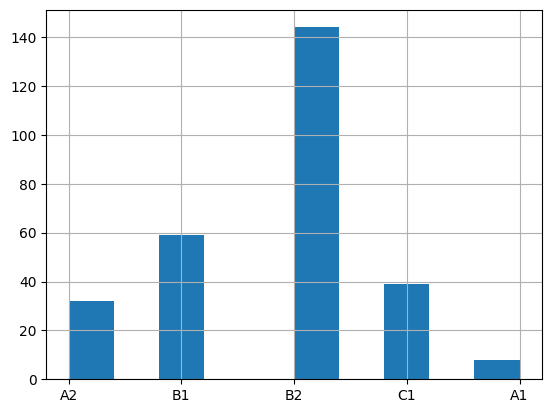

In [16]:
df['type'].hist()

Очевиден дисбаланс классов, который необходимо исправить.

### Upsampling

In [18]:
b1 = df[df['type'] == 'B1']
b2 = df[df['type'] == 'B2']
a1 = df[df['type'] == 'A1']
a2 = df[df['type'] == 'A2']
c1 = df[df['type'] == 'C1']

In [19]:
b1_up = resample(b1, replace=True, n_samples=len(b2), random_state=777)
a1_up = resample(a1, replace=True, n_samples=len(b2), random_state=777)
a2_up = resample(a2, replace=True, n_samples=len(b2), random_state=777)
c1_up = resample(c1, replace=True, n_samples=len(b2), random_state=777)

df_fin = pd.concat([a1_up, a2_up, b1_up, b2, c1_up], axis=0)

In [20]:
df_fin['type'].value_counts()

A1    144
A2    144
B1    144
B2    144
C1    144
Name: type, dtype: int64

Теперь можно переходить к векторизации.

## Vectorization

In [21]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_fin["clean_text"],df_fin["type"],test_size=0.2,shuffle=True)

In [22]:
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok = [nltk.word_tokenize(i) for i in X_train]  
X_test_tok = [nltk.word_tokenize(i) for i in X_test]

In [23]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [24]:
#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

df_fin['clean_text_tok'] = [nltk.word_tokenize(i) for i in df_fin['clean_text']]
model = Word2Vec(df_fin['clean_text_tok'],min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) 

  
modelw = MeanEmbeddingVectorizer(w2v)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_test_tok)

Подготовлено два набора векторизованных фичей на TF-IDF и word2vec, проверим оба, выберем лучшую модель.

## Models

По моделям возьмем линейку и катбуст

### TF-IDF

#### LogReg

In [29]:
logreg = LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
logreg.fit(X_train_vectors_tfidf, y_train)
#Predict y value for test dataset
y_pred_log = logreg.predict(X_test_vectors_tfidf)

print(classification_report(y_test,y_pred_log))
print()
print(confusion_matrix(y_test, y_pred_log))

              precision    recall  f1-score   support

          A1       1.00      1.00      1.00        29
          A2       0.92      1.00      0.96        33
          B1       0.93      1.00      0.96        25
          B2       1.00      0.81      0.89        31
          C1       0.96      1.00      0.98        26

    accuracy                           0.96       144
   macro avg       0.96      0.96      0.96       144
weighted avg       0.96      0.96      0.96       144


[[29  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 25  0  0]
 [ 0  3  2 25  1]
 [ 0  0  0  0 26]]


#### Catboost

In [30]:
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 3,
    'loss_function': 'MultiClass',
    'eval_metric': 'Accuracy',
    'random_seed': 42
}
cbc = CatBoostClassifier(**params)

cbc.fit(X_train_vectors_tfidf, y_train)
y_pred_cbc = cbc.predict(X_test_vectors_tfidf)


0:	learn: 0.6215278	total: 639ms	remaining: 10m 38s
1:	learn: 0.7118056	total: 1.08s	remaining: 9m 1s
2:	learn: 0.7413194	total: 1.52s	remaining: 8m 25s
3:	learn: 0.7743056	total: 1.98s	remaining: 8m 12s
4:	learn: 0.8246528	total: 2.46s	remaining: 8m 9s
5:	learn: 0.8159722	total: 2.93s	remaining: 8m 5s
6:	learn: 0.8229167	total: 3.38s	remaining: 7m 59s
7:	learn: 0.8454861	total: 3.83s	remaining: 7m 55s
8:	learn: 0.8437500	total: 4.28s	remaining: 7m 51s
9:	learn: 0.8472222	total: 4.73s	remaining: 7m 47s
10:	learn: 0.8489583	total: 5.21s	remaining: 7m 48s
11:	learn: 0.8593750	total: 5.67s	remaining: 7m 47s
12:	learn: 0.8663194	total: 6.13s	remaining: 7m 45s
13:	learn: 0.8663194	total: 6.58s	remaining: 7m 43s
14:	learn: 0.8750000	total: 7.03s	remaining: 7m 41s
15:	learn: 0.8854167	total: 7.47s	remaining: 7m 39s
16:	learn: 0.9045139	total: 7.91s	remaining: 7m 37s
17:	learn: 0.9131944	total: 8.35s	remaining: 7m 35s
18:	learn: 0.9218750	total: 8.8s	remaining: 7m 34s
19:	learn: 0.9253472	tota

In [31]:
print(classification_report(y_test,y_pred_cbc))
print()
print(confusion_matrix(y_test, y_pred_cbc))

              precision    recall  f1-score   support

          A1       1.00      1.00      1.00        29
          A2       0.94      1.00      0.97        33
          B1       0.93      1.00      0.96        25
          B2       0.96      0.87      0.92        31
          C1       1.00      0.96      0.98        26

    accuracy                           0.97       144
   macro avg       0.97      0.97      0.97       144
weighted avg       0.97      0.97      0.96       144


[[29  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 25  0  0]
 [ 0  2  2 27  0]
 [ 0  0  0  1 25]]


### W2V

#### LogReg

In [32]:
logreg2 = LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
logreg2.fit(X_train_vectors_w2v, y_train)
#Predict y value for test dataset
y_pred_log2 = logreg2.predict(X_val_vectors_w2v)

print(classification_report(y_test,y_pred_log2))
print()
print(confusion_matrix(y_test, y_pred_log2))

              precision    recall  f1-score   support

          A1       1.00      1.00      1.00        29
          A2       0.93      0.79      0.85        33
          B1       0.77      0.92      0.84        25
          B2       0.83      0.61      0.70        31
          C1       0.74      0.96      0.83        26

    accuracy                           0.85       144
   macro avg       0.85      0.86      0.85       144
weighted avg       0.86      0.85      0.84       144


[[29  0  0  0  0]
 [ 0 26  5  2  0]
 [ 0  0 23  2  0]
 [ 0  1  2 19  9]
 [ 0  1  0  0 25]]


#### Catboost

In [34]:
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 3,
    'loss_function': 'MultiClass',
    'eval_metric': 'Accuracy',
    'random_seed': 42
}
cbc2 = CatBoostClassifier(**params)

cbc2.fit(X_train_vectors_w2v, y_train)
y_pred_cbc2 = cbc.predict(X_val_vectors_w2v)


0:	learn: 0.6857639	total: 84.9ms	remaining: 1m 24s
1:	learn: 0.7309028	total: 128ms	remaining: 1m 4s
2:	learn: 0.7482639	total: 178ms	remaining: 59.1s
3:	learn: 0.7534722	total: 230ms	remaining: 57.3s
4:	learn: 0.7934028	total: 274ms	remaining: 54.5s
5:	learn: 0.8194444	total: 319ms	remaining: 52.9s
6:	learn: 0.8281250	total: 362ms	remaining: 51.4s
7:	learn: 0.8541667	total: 403ms	remaining: 50s
8:	learn: 0.8645833	total: 445ms	remaining: 49s
9:	learn: 0.8697917	total: 487ms	remaining: 48.2s
10:	learn: 0.8784722	total: 533ms	remaining: 47.9s
11:	learn: 0.8854167	total: 578ms	remaining: 47.6s
12:	learn: 0.8784722	total: 622ms	remaining: 47.2s
13:	learn: 0.8836806	total: 663ms	remaining: 46.7s
14:	learn: 0.8836806	total: 705ms	remaining: 46.3s
15:	learn: 0.8958333	total: 748ms	remaining: 46s
16:	learn: 0.8993056	total: 792ms	remaining: 45.8s
17:	learn: 0.9097222	total: 835ms	remaining: 45.6s
18:	learn: 0.9097222	total: 878ms	remaining: 45.3s
19:	learn: 0.9097222	total: 924ms	remaining: 

In [35]:
print(classification_report(y_test,y_pred_cbc2))
print()
print(confusion_matrix(y_test, y_pred_cbc2))

              precision    recall  f1-score   support

          A1       1.00      1.00      1.00        29
          A2       0.89      1.00      0.94        33
          B1       0.96      0.88      0.92        25
          B2       0.96      0.81      0.88        31
          C1       0.90      1.00      0.95        26

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144
weighted avg       0.94      0.94      0.94       144


[[29  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  2 22  1  0]
 [ 0  2  1 25  3]
 [ 0  0  0  0 26]]


Лучшая модель - катбуст на TF-IDF

## Outcomes

Для выполнения поставленной задачи, первичный датасет был консолидирован из множества папок с тагом сложности языка. Первичная предобработка позволила заполнить пропуски и унифицировать названия классов сложности языка.

Предобработка текста позволила убрать лишние знаки и стоп слова, привести слова к инфинитиву, подготовить текст  для перевода в вектор. было создано два набора векторизированных датафреймов: с использованием TF-IDF и word2vec методов.

В качестве моделей для обучения были выбраны логистическая регрессия и катбуст. На основании прогона моделей по датасетам лучшей по точности оказался катбуст на датафреймах TF-IDF с точностью 97%.